# Visualising High Dimensional Datasets with PCA and T-SNE
- Exploring data options:
    - Look at distribution of different variables
    - Look for correlations
- Higher dimensional datasets present difficulties when visualising.
- Explore the MNIST dataset
    - Dataset of 70k labelled images of handwritten numbers 0-9
    - The images are all essentially 28-by-28 pixel images and therefore have a total of 784 ‘dimensions’, each holding the value of one specific pixel.
    - What we can do is reduce the number of dimensions drastically whilst trying to retain as much of the ‘variation’ in the information as possible.

In [7]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print (X.shape, y.shape)

(70000, 784) (70000,)


In [8]:
# convert the matrix and vector to pandas dataframe

import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (70000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random subset

Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us later to select the first five or ten thousand for our calculations and visualisations.

In [9]:
rndperm = np.random.permutation(df.shape[0])

### Viewing random images

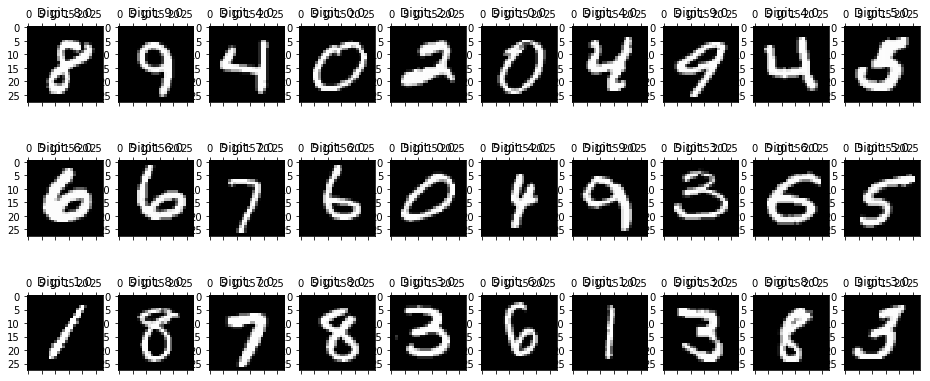

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### Dimensionality reduction using PCA
- PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information.
- It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.
- It uses something known as the eigenvalues and eigenvectors of the data-matrix. 
- These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.
- Since we as humans like our two- and three-dimensional plots lets start with that and generate, from the original 784 dimensions, the first three principal components. And we’ll also see how much of the variation in the total dataset they actually account for.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


- first two components account for about 25% of the variation in the entire dataset
- Lets see if that is enough to visually set the different digits apart
- create a scatterplot of the first and second principal component and color each of the different types of digits with a different color
- If we are lucky the same type of digits will be positioned (i.e., clustered) together in groups

/usr/local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


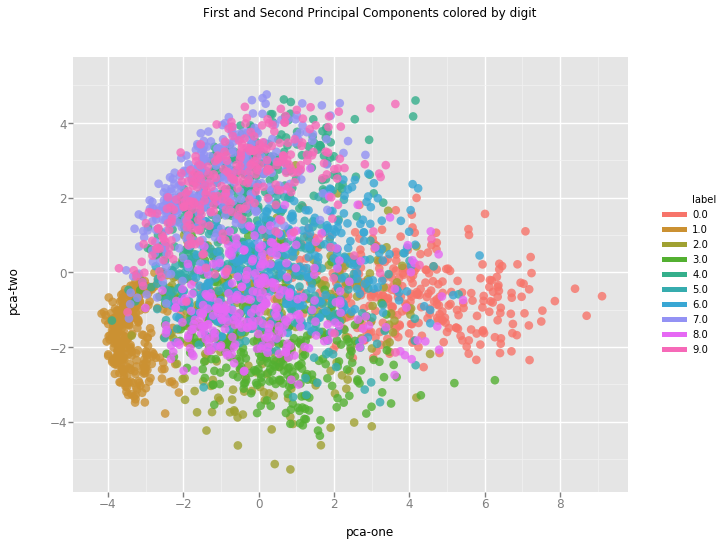

<ggplot: (-9223372036569711328)>

In [15]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

- From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart

### T-Distributed Stochastic Neighbouring Entities (t-SNE)

- t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets
- Contrary to PCA it is not a mathematical technique but a probablistic one

> t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

- it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions
- The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique
- For example one of the recommendations is that, in case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE

#### Drawbacks
> It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

> Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)

- Contrary to the recommendation above we will first try to run the algorithm on the actual dimensions of the data (784) and see how it does
- To make sure we don’t burden our machine in terms of memory and power/time we will only use the first 7,000 samples to run the algorithm on

In [16]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.495s...
[t-SNE] Computed neighbors for 7000 samples in 42.998s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.236044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.237663
[t-SNE] Error after 300 iterations: 2.422524
t-SNE done! Time elapsed: 108.53531813621521 seconds


- we have the two resulting dimensions we can again visualise

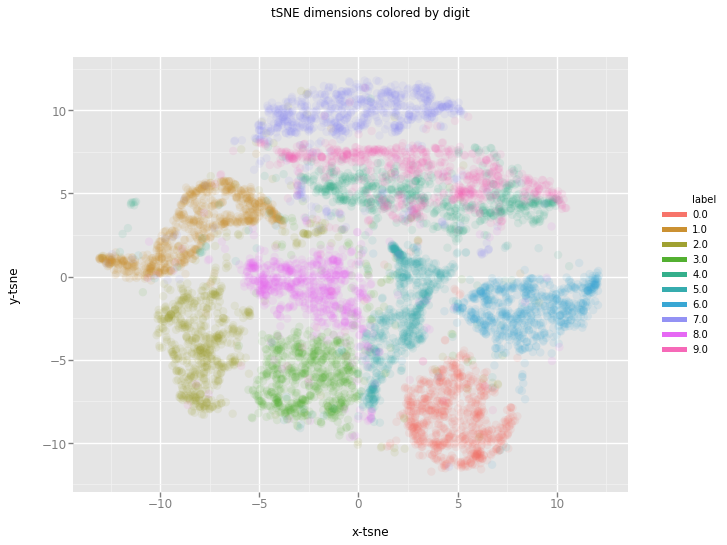

<ggplot: (285468017)>

In [17]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

- This is already a significant improvement over the PCA visualisation we used earlier. We can see that the digits are very clearly clustered in their own little group
- If we would now use a clustering algorithm to pick out the seperate clusters we could probably quite accurately assign new points to a label

#### Reduce dimensions for t-SNE
- We’ll now take the recommandations to heart and actually reduce the number of dimensions before feeding the data into the t-SNE algorithm
- For this we’ll use PCA again. We will first create a new dataset containing the fifty dimensions generated by the PCA reduction algorithm
- We can then use this dataset to perform the t-SNE on

In [18]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

print ('Explained variation per principal component (PCA): {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Explained variation per principal component (PCA): 0.8253911508450723


- the first 50 components roughly hold around 85% of the total variation in the data
- lets try and feed this data into the t-SNE algorithm. This time we’ll use 10,000 samples out of the 70,000 to make sure the algorithm does not take up too much memory and CPU

In [19]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 9.423s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.851580
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.337692
[t-SNE] Error after 300 iterations: 2.771679
t-SNE done! Time elapsed: 106.042

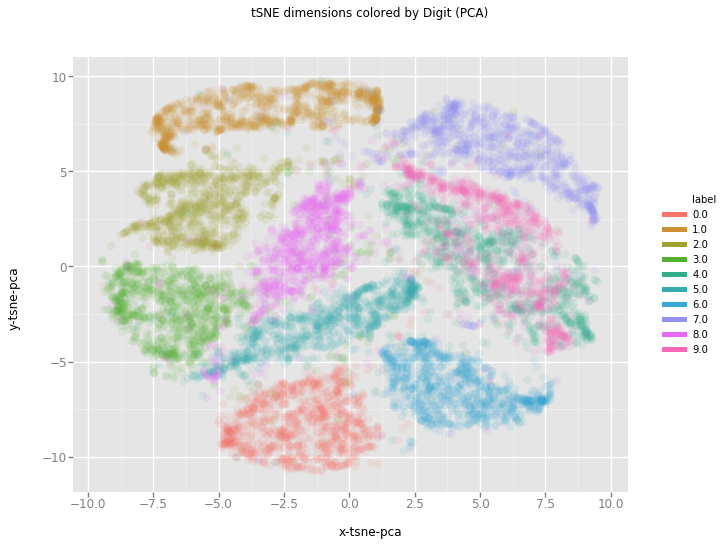

<ggplot: (285472334)>

In [20]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart

- From this plot we can clearly see how all the samples are nicely spaced apart and grouped together with their respective digits
- This could be an amazing starting point to then use a clustering algorithm and try to identify the clusters or to actually use these two dimensions as input to another algorithm (e.g., something like a Neural Network)